Crypto Prediction 

importing all the requirements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
import matplotlib.dates as npldates

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from joblib import dump
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit


import warnings
warnings.filterwarnings('ignore')




Extraction of the crypto coins from yfinance

In [2]:
coin_list = ["BTC", "ETH", "LTC", "DOGE"]
df_list = []

for coin in coin_list:
    crpto2 = yf.Ticker(f"{coin}-USD").history(
        start = "2023-01-01",
        end = "2025-04-22",
        interval = "1d"
    )
    crypto2 = pd.DataFrame(crpto2)
    crpto2["crypto_name"] = coin
    df_list.append(crpto2)

crypto = pd.concat(df_list)

crypto.reset_index(inplace=True)
crypto.drop(["Stock Splits", "Dividends"], axis=1, inplace=True)


crypto["year"] = crypto["Date"].dt.year
crypto["month"] = crypto["Date"].dt.month

crypto.to_csv("Raw Data.csv", index = False)

Exploratory Data Analysis

In [3]:
crypto.head() # Top 5 of the data

,Date,Open,High,Low,Close,Volume,crypto_name,year,month
0,2023-01-01 00:00:00+00:00,16547.914062,16630.439453,16521.234375,16625.080078,9244361700,BTC,2023,1
1,2023-01-02 00:00:00+00:00,16625.509766,16759.343750,16572.228516,16688.470703,12097775227,BTC,2023,1
2,2023-01-03 00:00:00+00:00,16688.847656,16760.447266,16622.371094,16679.857422,13903079207,BTC,2023,1
3,2023-01-04 00:00:00+00:00,16680.205078,16964.585938,16667.763672,16863.238281,18421743322,BTC,2023,1
4,2023-01-05 00:00:00+00:00,16863.472656,16884.021484,16790.283203,16836.736328,13692758566,BTC,2023,1


In [4]:
crypto.tail() # bottom 5 of the dataset

,Date,Open,High,Low,Close,Volume,crypto_name,year,month
3363,2025-04-17 00:00:00+00:00,0.154691,0.159351,0.153181,0.155740,586169227,DOGE,2025,4
3364,2025-04-18 00:00:00+00:00,0.155741,0.158770,0.153774,0.157616,477534244,DOGE,2025,4
3365,2025-04-19 00:00:00+00:00,0.157618,0.160556,0.156523,0.157333,477710096,DOGE,2025,4
3366,2025-04-20 00:00:00+00:00,0.157333,0.159283,0.152745,0.155184,637644889,DOGE,2025,4
3367,2025-04-21 00:00:00+00:00,0.155184,0.162934,0.155140,0.159388,1038358279,DOGE,2025,4


In [5]:
results = crypto["crypto_name"].tolist()
print(results) # check all coins are imported


['BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC', 'BTC'

In [6]:
crypto.isnull().sum() # Shows Count of the null values

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
crypto_name    0
year           0
month          0
dtype: int64

In [7]:
crypto.info() #Gain info on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Date         3368 non-null   datetime64[ns, UTC]
 1   Open         3368 non-null   float64            
 2   High         3368 non-null   float64            
 3   Low          3368 non-null   float64            
 4   Close        3368 non-null   float64            
 5   Volume       3368 non-null   int64              
 6   crypto_name  3368 non-null   object             
 7   year         3368 non-null   int32              
 8   month        3368 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(4), int32(2), int64(1), object(1)
memory usage: 210.6+ KB


In [8]:
crypto.describe() # Check the stats of the import

,Open,High,Low,Close,Volume,year,month
count,3368.000000,3368.000000,3368.000000,3368.000000,3.368000e+03,3368.000000,3368.000000
mean,13916.520311,14190.171324,13648.288088,13937.704001,1.160815e+10,2023.698337,5.973872
std,25958.645624,26478.002228,25433.383643,25989.412720,1.661757e+10,0.688811,3.528731
min,0.057897,0.058495,0.057466,0.057897,9.248368e+07,2023.000000,1.000000
25%,42.104806,44.564434,37.934114,42.104756,5.036249e+08,2023.000000,3.000000
50%,666.851540,675.042404,662.543663,668.977539,4.411300e+09,2024.000000,6.000000
75%,7186.996338,7237.826538,7110.940796,7206.103821,1.685763e+10,2024.000000,9.000000
max,106147.296875,109114.882812,105291.734375,106146.265625,1.492189e+11,2025.000000,12.000000


Text(0.5, 1.0, 'Average Volume of Different Cryptos')

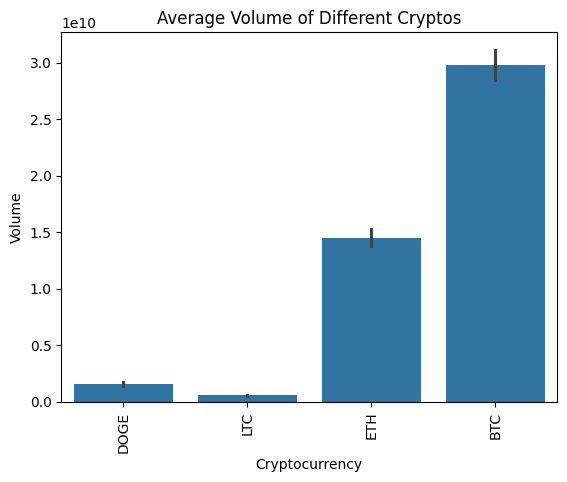

In [9]:
crypto_sorted = crypto.sort_values('Volume') # bar plot of crypto values
plt.Figure(figsize=(12,6))
sns.barplot(x='crypto_name', y='Volume', data=crypto_sorted, estimator=np.mean)
plt.xticks(rotation=90)
plt.xlabel('Cryptocurrency')
plt.ylabel('Volume')
plt.title('Average Volume of Different Cryptos')


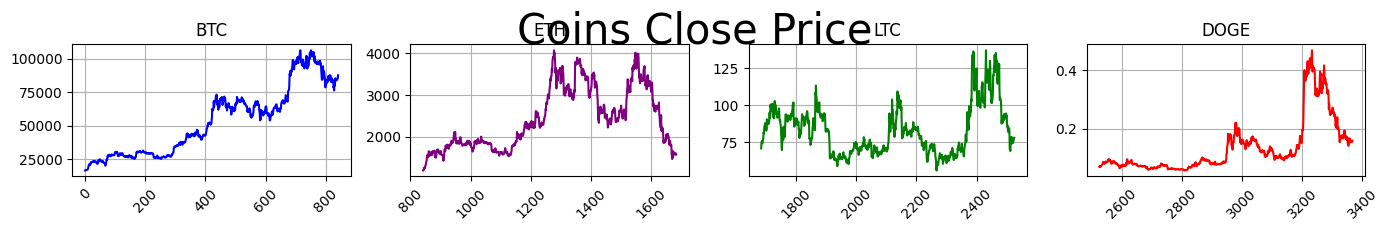

In [10]:
# Figure to visaulise the close prices of different cryptos
fig = plt.figure(figsize=(14,12))
fig.suptitle('Coins Close Price', fontsize=30, y=0.95)

colors = ['blue', 'purple', 'green', 'red', 'pink','indigo','brown','yellow','orange', 'violet']

for i, coin in enumerate(coin_list):
    data= crypto[crypto["crypto_name"] == coin]
    ax = fig.add_subplot(6,4, i+1)
    ax.plot(data.index, data['Close'], color = colors[i%len(colors)])
    ax.set_title(coin, fontsize = 12)
    ax.tick_params(axis='x', labelrotation=45)
    ax.grid(True)
# creates visualisation of close prices of the different coins in grid layout
plt.tight_layout()
plt.show()

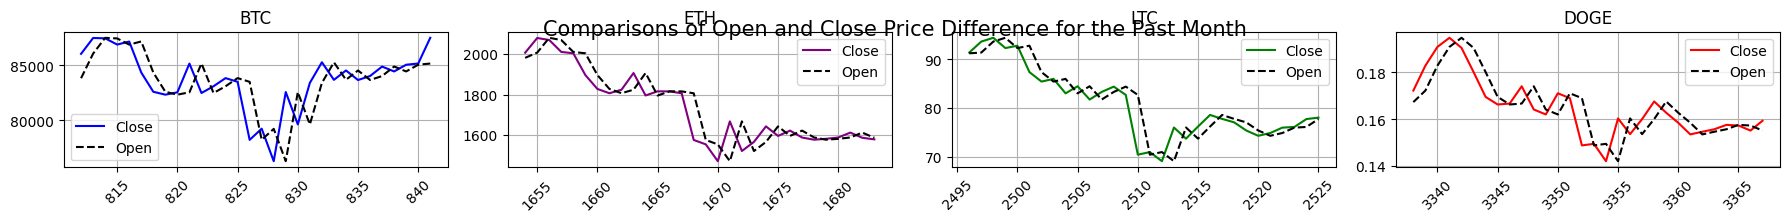

In [11]:
#visualisation of the comparison of the open and close prices for diff coins
fig = plt.figure(figsize=(18,12))
fig.suptitle('Comparisons of Open and Close Price Difference for the Past Month', fontsize=15, y=0.95)

colors = ['blue', 'purple', 'green', 'red', 'pink','indigo','brown','yellow','orange', 'violet']

for i, coin in enumerate(coin_list):
    data= crypto[crypto["crypto_name"] == coin]
    ax = fig.add_subplot(6, 4 , i+1)
    ax.plot(data.index[-30:], data['Close'][-30:], color = colors[i%len(colors)], label='Close')
    ax.plot(data.index[-30:], data['Open'][-30:], color ='black', linestyle='--', label='Open')
    ax.set_title(coin, fontsize=12)
    ax.tick_params(axis="x", labelrotation=45)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

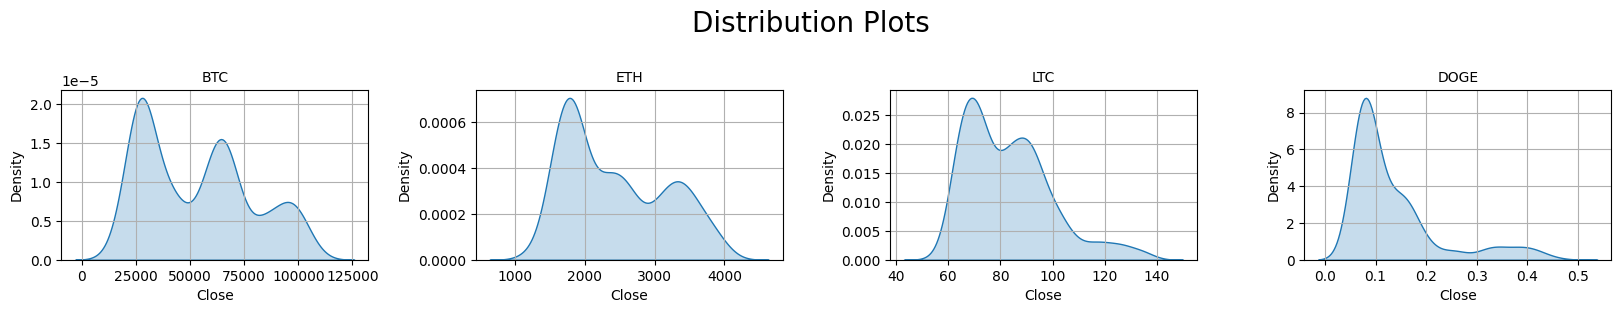

In [12]:
# visualisation plots
plt.figure(figsize=(20,20))
plt.suptitle("Distribution Plots", fontsize=20, y=0.92)

colors = sns.color_palette("husl", len(coin_list))

for i,coin in enumerate(coin_list):
    data= crypto[crypto["crypto_name"] == coin]
    ax = plt.subplot(6,4, i+1)
    sns.kdeplot(data = data, x= data.Close, palette=colors[i%len(colors)], shade=True)
    ax.set_title(coin, fontsize=10)
    ax.grid(True)

plt.subplots_adjust(wspace=0.35, bottom=0.2, hspace=0.4)
plt.show()

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>, <Axes: >]], dtype=object)

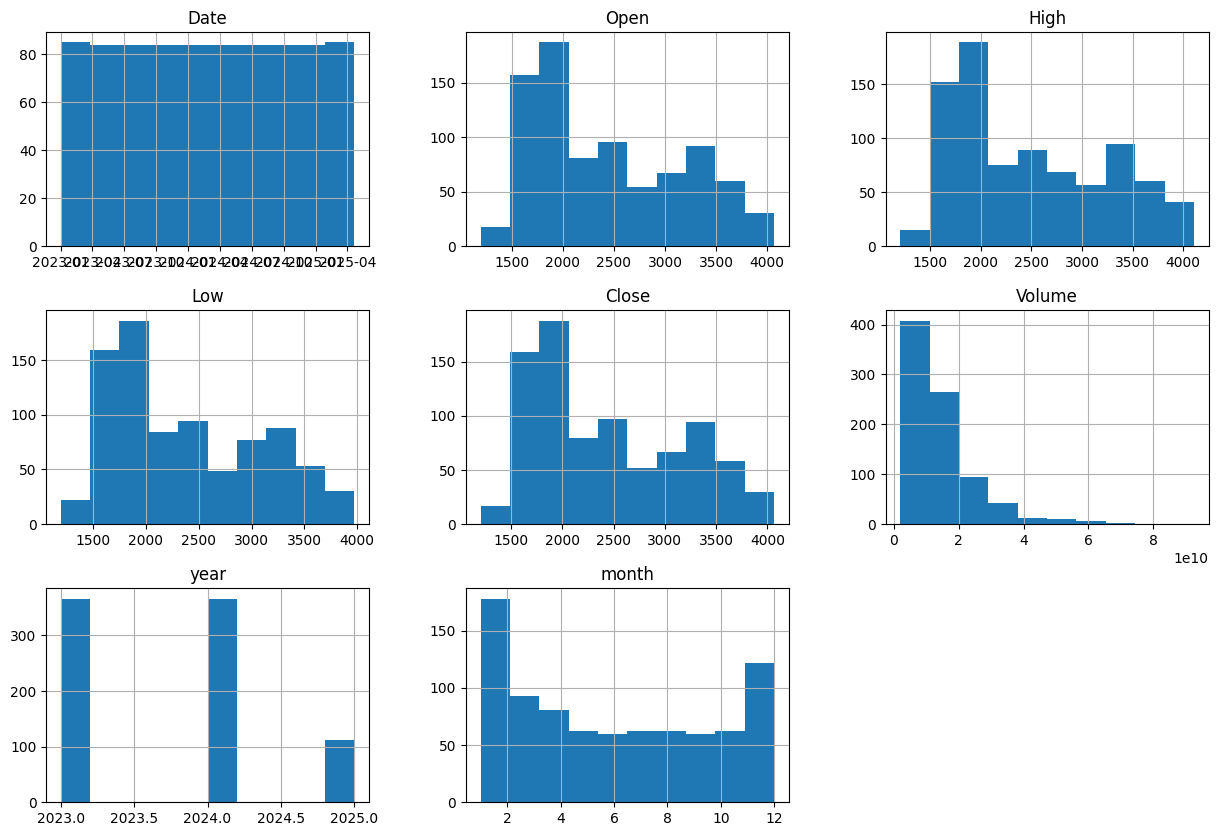

In [13]:
# slicing single coin for further analysis
coin = "ETH"
coin_df = crypto[crypto["crypto_name"] == coin]
coin_df.hist(figsize=(15,10))

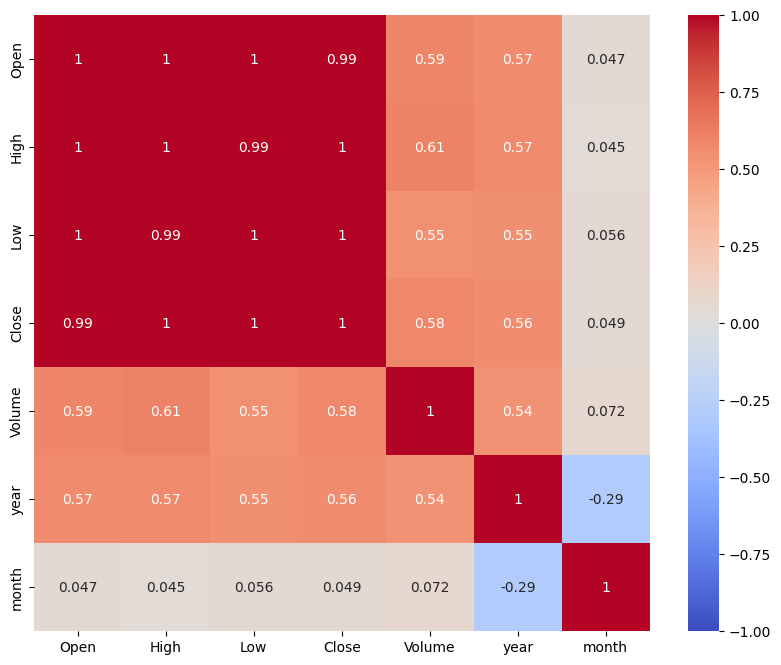

In [14]:
# selet only numeric columns for correlation
numeric_cols = coin_df.select_dtypes(include="number")
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, vmin=-1.0, annot=True, square = True, cmap='coolwarm')#
plt.show()

Label Encoding

In [15]:
# To intitalise label encodign
df_encoded = crypto.copy()
label_encoder = LabelEncoder()
label_encoder.fit(df_encoded["crypto_name"])
df_encoded["crypto_encoded"] = label_encoder.transform(df_encoded["crypto_name"])
df_encoded


,Date,Open,High,Low,Close,Volume,crypto_name,year,month,crypto_encoded
0,2023-01-01 00:00:00+00:00,16547.914062,16630.439453,16521.234375,16625.080078,9244361700,BTC,2023,1,0
1,2023-01-02 00:00:00+00:00,16625.509766,16759.343750,16572.228516,16688.470703,12097775227,BTC,2023,1,0
2,2023-01-03 00:00:00+00:00,16688.847656,16760.447266,16622.371094,16679.857422,13903079207,BTC,2023,1,0
3,2023-01-04 00:00:00+00:00,16680.205078,16964.585938,16667.763672,16863.238281,18421743322,BTC,2023,1,0
4,2023-01-05 00:00:00+00:00,16863.472656,16884.021484,16790.283203,16836.736328,13692758566,BTC,2023,1,0
...,...,...,...,...,...,...,...,...,...,...
3363,2025-04-17 00:00:00+00:00,0.154691,0.159351,0.153181,0.155740,586169227,DOGE,2025,4,1
3364,2025-04-18 00:00:00+00:00,0.155741,0.158770,0.153774,0.157616,477534244,DOGE,2025,4,1
3365,2025-04-19 00:00:00+00:00,0.157618,0.160556,0.156523,0.157333,477710096,DOGE,2025,4,1
3366,2025-04-20 00:00:00+00:00,0.157333,0.159283,0.152745,0.155184,637644889,DOGE,2025,4,1


Important Feature

In [16]:
X = df_encoded.drop(["Close", "crypto_name", "Date"], axis=1)
y = df_encoded["Close"]

rf = RandomForestRegressor(n_estimators= 70, random_state=32)

rf.fit(X,y)

importance = rf.feature_importances_
feature_importance = pd.DataFrame({"Feature": X.columns,
                                   "Importance": importance}).sort_values("Importance",ascending=False)
print(feature_importance)

          Feature  Importance
2             Low    0.582986
1            High    0.314054
0            Open    0.088231
6  crypto_encoded    0.014670
3          Volume    0.000036
5           month    0.000019
4            year    0.000004


Visualisation of the importance features

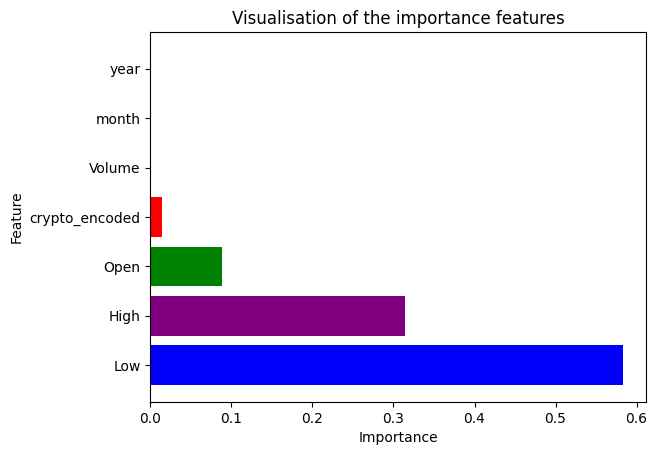

In [17]:
colors = ['blue', 'purple', 'green', 'red', 'pink','indigo','brown','yellow','orange', 'violet']

plt.barh(feature_importance["Feature"], feature_importance["Importance"], color=colors)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Visualisation of the importance features")
plt.show()

Scaling the features

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df_encoded[["Open", "Low", "High", "Close", "crypto_encoded"]])

def myScaler(data):
    global scaler
    data_ = data.copy()
    data_scaled_ = scaler.transform(data_)
    data_scaled_ = pd.DataFrame(data_scaled_, columns = data_.columns)
    data_scaled_.index = data_.index
    return data_scaled_

def myInverseScale(data):
    global scaler
    data_scaler_inverse = scaler.inverse_transform(data)
    data_scaler_inverse = pd.DataFrame(data_scaler_inverse, columns = data.columns)
    data_scaler_inverse.index = data.index
    return data_scaler_inverse



In [19]:
to_scale = df_encoded[["Open", "Low", "High", "Close", "crypto_encoded"]]
df_scaled = myScaler(to_scale)

In [20]:
df_scaled.head(10)

,Open,Low,High,Close,crypto_encoded
0,0.155895,0.156909,0.152412,0.156624,0.0
1,0.156626,0.157393,0.153593,0.157221,0.0
2,0.157223,0.157869,0.153603,0.157140,0.0
3,0.157142,0.158300,0.155474,0.158867,0.0
4,0.158868,0.159464,0.154736,0.158618,0.0
5,0.158614,0.158762,0.155725,0.159703,0.0
6,0.159703,0.160641,0.155570,0.159733,0.0
7,0.159722,0.160734,0.156634,0.161015,0.0
8,0.161040,0.162348,0.159372,0.162008,0.0
9,0.161972,0.163004,0.160241,0.164360,0.0


Deployment of models

In [21]:
df_encoded["Date"] = crypto["Date"]

X = df_encoded.drop(["Close", "crypto_name", "Date"], axis=1)
y = df_encoded.Close

Training and Test Split

R-square: -5763.106623686774
Mean Absolute Error: 2528.7336557286135
Mean Squared Error: 10228332.359834144


<Axes: xlabel='Date'>

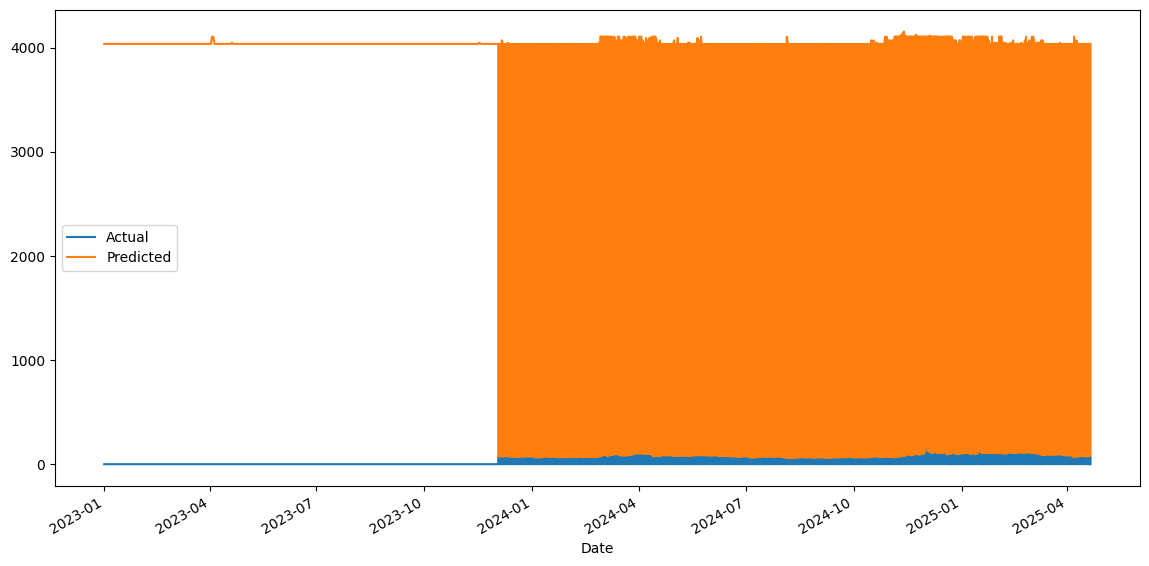

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.4, shuffle=False)

date_test = df_encoded.loc[X_test.index, "Date"]

model = RandomForestRegressor()
model.fit(X_train, y_train)
predicted = model.predict(X_test)


results = pd.DataFrame({"Date": date_test,
                       "Actual": y_test,
                       "Predicted": predicted})


print(f"R-square: {r2_score(y_test, predicted)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predicted)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predicted)}")


results.sort_values("Date", inplace=True)
results.set_index("Date",inplace=True)
results[["Actual", "Predicted"]].plot(figsize=(14,7))

Hyper parameter fine tuning

In [23]:
# Create a RandomForestRegressor object
rf = RandomForestRegressor()
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(1,50),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', 1.0, None]  # <-- Valid options
}


# Define the rolling-window cross-validation split
tscv = TimeSeriesSplit(n_splits=5)

random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=tscv,
                                   random_state=42)

random_search.fit(X, y)

# Print the best parameters and score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'bootstrap': False, 'max_depth': 11, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 6}
Best Score:  -373.402853643657


R-square: 0.9991976877657058
Mean Absolute Error: 0.002279710821296406
Mean Squared Error: 4.731650535589575e-05


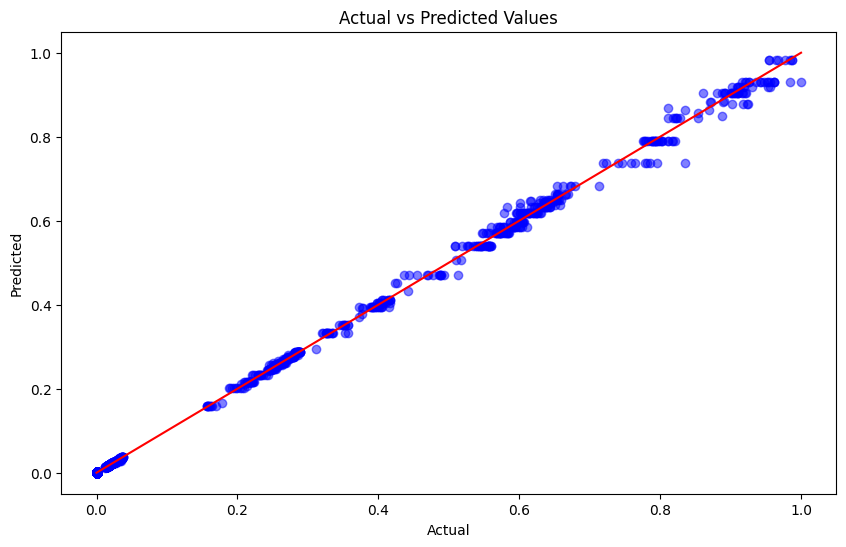

In [41]:
X = df_scaled.drop('Close', axis=1)
y = df_scaled['Close']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.7, random_state=1)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

model = RandomForestRegressor(bootstrap=False, max_depth= 11, max_features=1.0, min_samples_leaf=1, min_samples_split=10, n_estimators=6)

model.fit(X_train, y_train)

predicted = model.predict(X_test)

print(f"R-square: {r2_score(y_test, predicted)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predicted)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predicted)}")

# plot predicted values vs the actual values

plt.figure(figsize=(10,6))
plt.scatter(y_test, predicted, color='blue', alpha = 0.5)
plt.plot(np.linspace(0, np.max(y_test),100), np.linspace(0, np.max(y_test),100), color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()

Using random forest to predict time series

In [25]:
import pandas as pd
df = pd.read_csv("Raw Data.csv", parse_dates =["Date"])
df.sort_values("Date", inplace = True)

df.tail()


,Date,Open,High,Low,Close,Volume,crypto_name,year,month
840,2025-04-20 00:00:00+00:00,85066.070312,85306.382812,83976.843750,85174.304688,14664050812,BTC,2025,4
1683,2025-04-21 00:00:00+00:00,1587.460938,1656.119629,1566.147461,1579.734497,15403785611,ETH,2025,4
841,2025-04-21 00:00:00+00:00,85171.539062,88460.093750,85143.835938,87518.906250,41396190190,BTC,2025,4
2525,2025-04-21 00:00:00+00:00,77.748589,81.492622,77.481041,78.047279,410886865,LTC,2025,4
3367,2025-04-21 00:00:00+00:00,0.155184,0.162934,0.155140,0.159388,1038358279,DOGE,2025,4


In [ ]:
# Create a new column for the closes which contains the values of the 'Close' column shifted by the number in the shift time step
df["Close_lag1"] = df["Close"].shift(1)
df["Close_lag2"] = df["Close"].shift(2)
df["Close_lag3"] = df["Close"].shift(3)
df.dropna(inplace=True)

In [ ]:
# Define the feature set 'X' as a DataFrame containing the lagged features: 'Close_lag1', 'Close_lag2', and 'Close_lag3'
X = df[["Close_lag1", "Close_lag2", "Close_lag3"]]

# Define the target variable 'y' as the 'Close' column, representing the value to be predicted
y = df["Close"]

In [ ]:
# Calculate the size of the training set as 80% of the total number of rows in the DataFrame
train_size = int(len(df) * 0.8)

# Split the feature set 'X' into training and testing subsets based on the calculated training size
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]

# Split the target variable 'y' into training and testing subsets based on the calculated training size
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Import the RandomForestRegressor class from the scikit-learn library for regression modeling
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model with default parameters
model = RandomForestRegressor()

# Train the RandomForestRegressor model using the training feature set 'X_train' and the training target variable 'y_train'
model.fit(X_train, y_train)

# Use the trained model to predict the target variable 'y' for the testing feature set 'X_test'
predictions = model.predict(X_test)


In [36]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# find the metrics for the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 29359.966692178357
Mean Squared Error (MSE): 1507758473.790773
Root Mean Squared Error (RMSE): 38829.865745206655
R^2 Score: 0.04673627935832547


In [42]:
cryptos = ["BTC", "ETH", "LTC", "DOGE"]
all_future_preds = []

for c in cryptos:
    df_c = df[df["crypto_name"] == c].copy()
    df_c.sort_values("Date", inplace=True)

    df_c["Close_lag1"] = df_c["Close"].shift(1)
    df_c.dropna(inplace=True)

    #Training the model for this crypto
    X_c = df_c[["Close_lag1"]]  # or more features
    y_c = df_c["Close"]
    from sklearn.ensemble import RandomForestRegressor
    # For simplicity, I fitted the model on the entire dataset for this crypto.
    model_c = RandomForestRegressor(random_state=42)
    model_c.fit(X_c, y_c)

    # 4) Predict the future for this crypto using iterative approach
    #   show an example for 7 days
    n_future = 7
    future_predictions = []
    
    # Get the last known close to seed the forecast
    last_close = df_c.iloc[-1]["Close"]
    
    for i in range(n_future):
        #To Build the features for day i
        X_future = [[last_close]] 
        pred_close = model_c.predict(X_future)[0]
        
        future_predictions.append(pred_close)
        last_close = pred_close
    last_date = df_c["Date"].iloc[-1]
    future_dates = [last_date + pd.Timedelta(days=x) for x in range(1, n_future+1)]
    
    future_df_c = pd.DataFrame({
        "Date": future_dates,
        "Predicted_Close": future_predictions,
        "crypto_name": c
    })
    
    #To append the result to the list
    all_future_preds.append(future_df_c)

#To combine all forecasts
final_future_df = pd.concat(all_future_preds, ignore_index=True)
print(final_future_df)

                        Date  Predicted_Close crypto_name
0  2025-04-22 00:00:00+00:00     87682.890234         BTC
1  2025-04-23 00:00:00+00:00     87720.320234         BTC
2  2025-04-24 00:00:00+00:00     88420.143672         BTC
3  2025-04-25 00:00:00+00:00     87482.015625         BTC
4  2025-04-26 00:00:00+00:00     87477.394922         BTC
5  2025-04-27 00:00:00+00:00     87477.394922         BTC
6  2025-04-28 00:00:00+00:00     87477.394922         BTC
7  2025-04-22 00:00:00+00:00      1573.847537         ETH
8  2025-04-23 00:00:00+00:00      1608.334591         ETH
9  2025-04-24 00:00:00+00:00      1607.941208         ETH
10 2025-04-25 00:00:00+00:00      1620.755040         ETH
11 2025-04-26 00:00:00+00:00      1594.897490         ETH
12 2025-04-27 00:00:00+00:00      1625.352875         ETH
13 2025-04-28 00:00:00+00:00      1636.613691         ETH
14 2025-04-22 00:00:00+00:00        79.645705         LTC
15 2025-04-23 00:00:00+00:00        78.416231         LTC
16 2025-04-24 

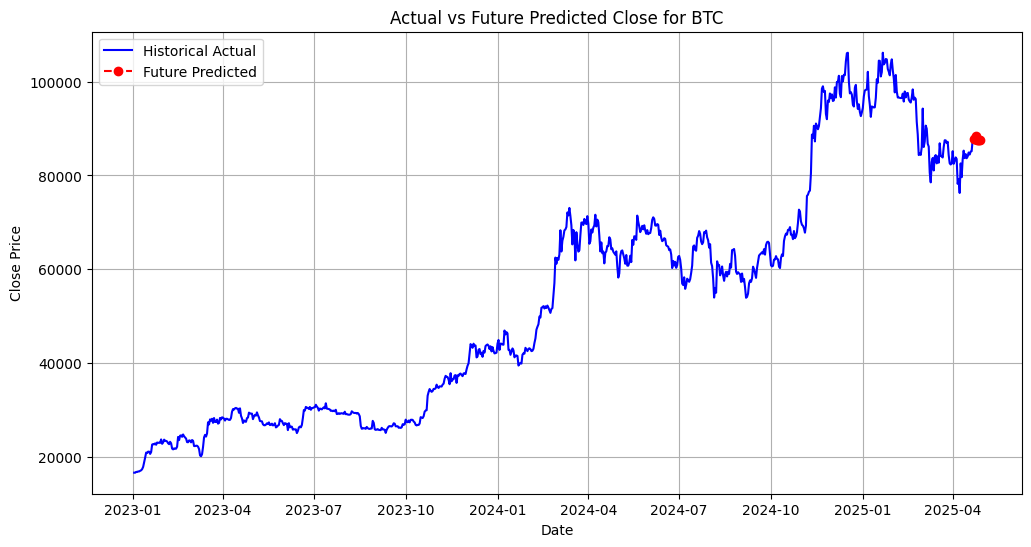

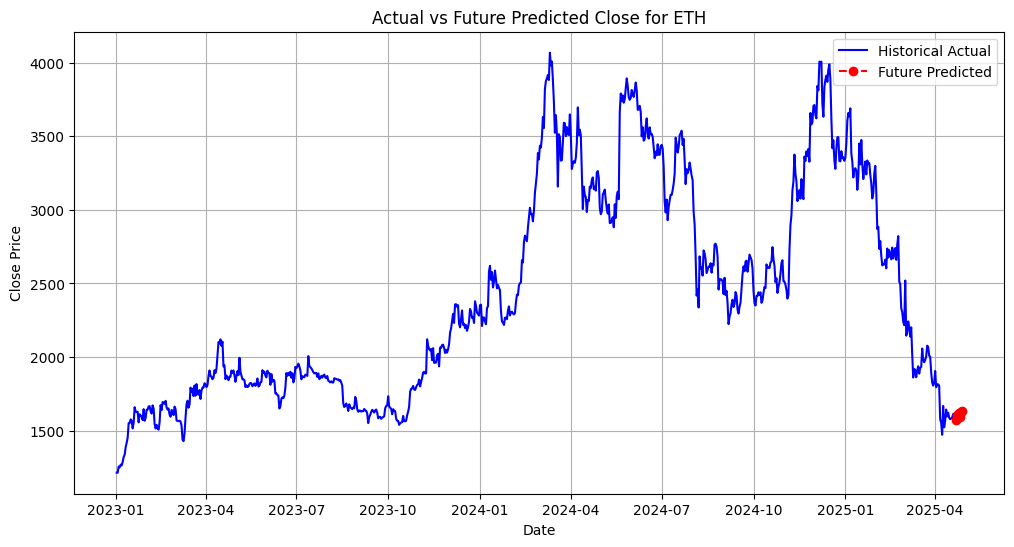

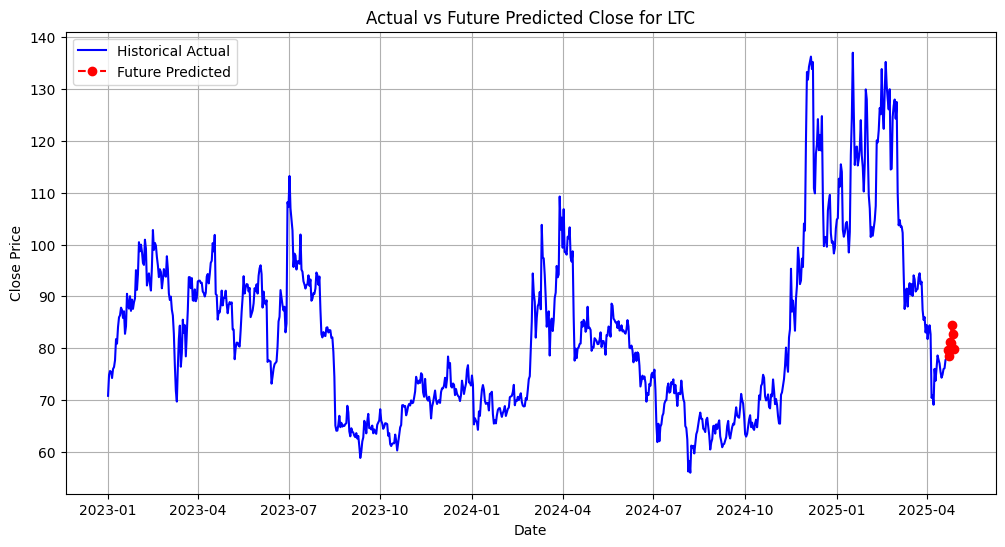

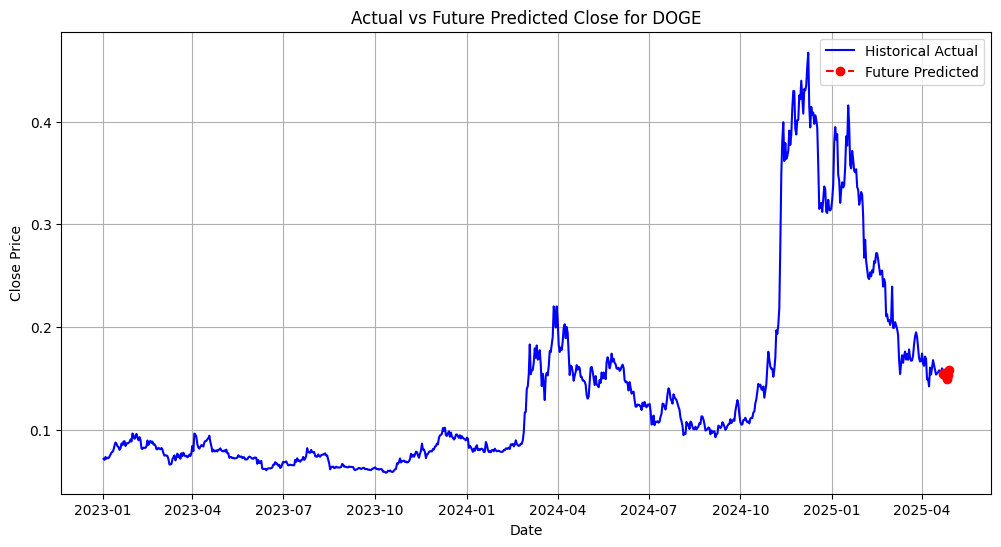

In [43]:
# Import the matplotlib library for data visualization
import matplotlib.pyplot as plt

# Define a list of cryptocurrency names to analyze and visualize
cryptos = ["BTC", "ETH", "LTC", "DOGE"]

# Iterate over each cryptocurrency in the list to plot their respective graphs
for c in cryptos:
    # Filter the dataset 'df' to include only rows corresponding to the current cryptocurrency 'c'
    df_c = df[df["crypto_name"] == c].copy()

    # Sort the filtered dataset 'df_c' by the 'Date' column for accurate time-series plotting
    df_c.sort_values("Date", inplace=True)

    # Filter the future predictions dataset 'final_future_df' to include rows for the current cryptocurrency 'c'
    future_df_c = final_future_df[final_future_df["crypto_name"] == c]

    # Create a new figure with a specified size for the graph
    plt.figure(figsize=(12, 6))

    # Plot the historical closing prices for the current cryptocurrency in blue
    plt.plot(df_c["Date"], df_c["Close"], label="Historical Actual", color="blue")

    # Plot the future predicted closing prices for the current cryptocurrency in red, with markers and a dashed line
    plt.plot(future_df_c["Date"], future_df_c["Predicted_Close"],
             label="Future Predicted", marker="o", linestyle="--", color="red")

    # Add labels to the x-axis (Date) and y-axis (Close Price)
    plt.xlabel("Date")
    plt.ylabel("Close Price")

    # Set a title for the graph, dynamically including the cryptocurrency name
    plt.title(f"Actual vs Future Predicted Close for {c}")

    # Display a legend to differentiate between historical and future predicted data
    plt.legend()

    # Add a grid to the graph for improved readability and visual clarity
    plt.grid(True)

    # Show the graph for the current cryptocurrency
    plt.show()

To see the Actual vs Predicted of the 4 cryptos

BTC Metrics: R square = 0.9992, MSE = 503802.4836, RMSE = 709.7905


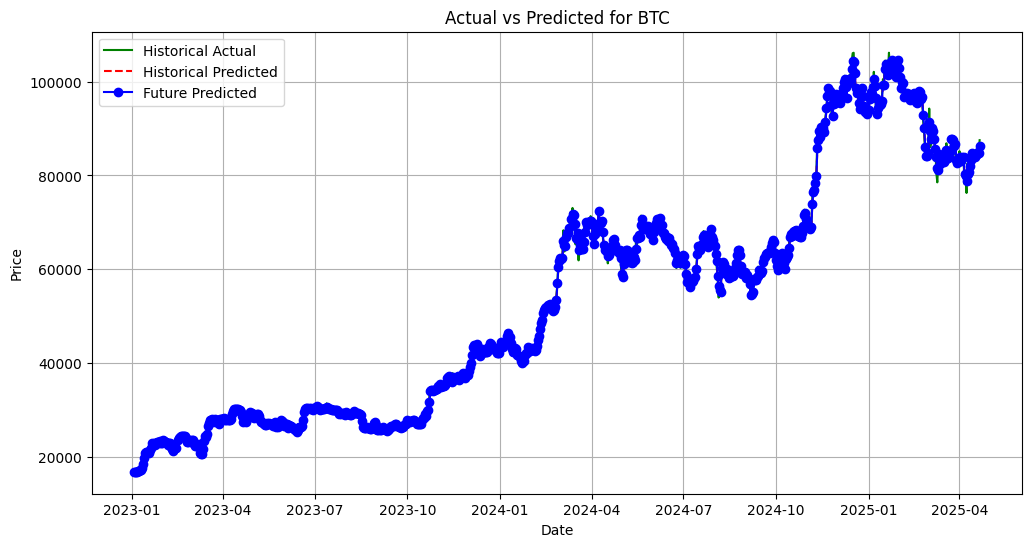

ETH Metrics: R square = 0.9975, MSE = 1341.6852, RMSE = 36.6290


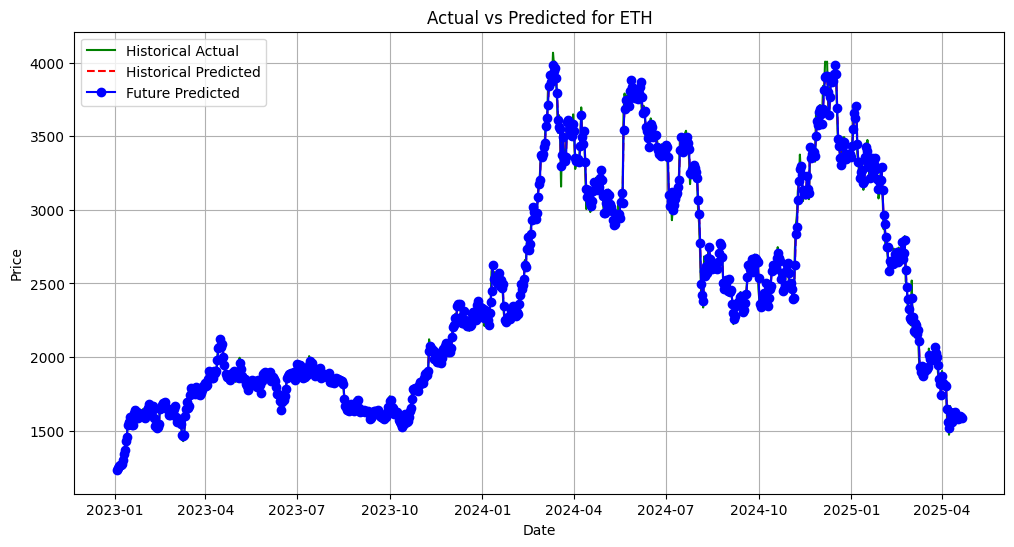

LTC Metrics: R square = 0.9904, MSE = 2.6224, RMSE = 1.6194


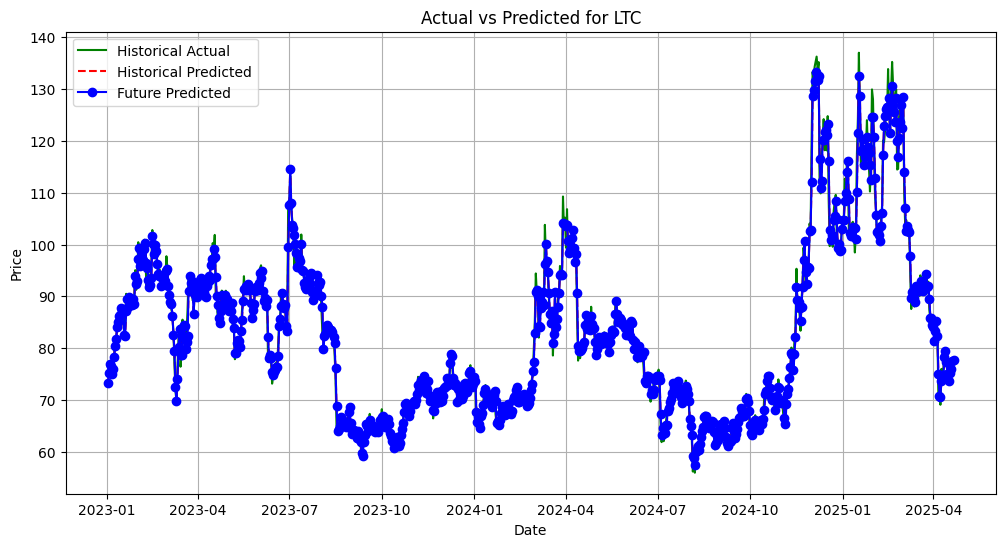

DOGE Metrics: R square = 0.9980, MSE = 0.0000, RMSE = 0.0040


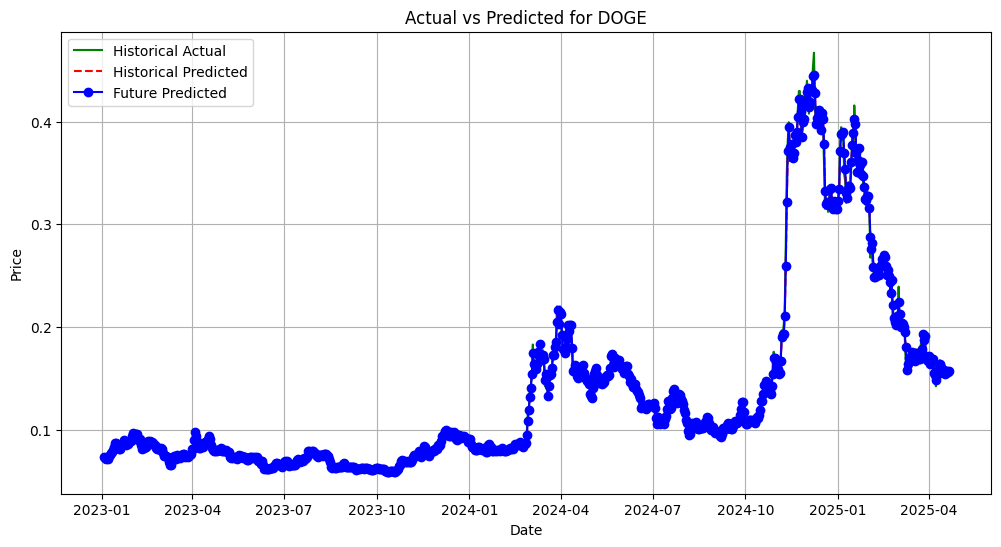

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from joblib import dump

cryptos = ["BTC", "ETH", "LTC", "DOGE"]

for c in cryptos:
    df_c = df[df["crypto_name"] == c].copy()
    df_c.sort_values("Date", inplace=True)
    df_c["Close_lag1"] = df_c["Close"].shift(1)
    df_c.dropna(inplace=True)
    X_c = df_c[["Close_lag1"]]
    y_c = df_c["Close"]
    model_c = RandomForestRegressor(random_state=42)
    model_c.fit(X_c,y_c)
    df_c["Predicted_Close"] = model_c.predict(X_c)


    # Find Metrics
    r2 = r2_score(y_c, df_c["Predicted_Close"])
    mse = mean_squared_error(y_c, df_c["Predicted_Close"])
    rmse = mse ** 0.5
    print(f"{c} Metrics: R square = {r2:.4f}, MSE = {mse:.4f}, RMSE = {rmse:.4f}")

    # Save each coin along with the name
    dump(model_c,f"model_{c}.joblib") # Saving the model

    # Choose how many days for the prediction
    n_future = 14
    future_predictions = []
    last_close = df_c.iloc[-1]["Close"]

    for i in range(n_future):
        X_future = [[last_close]]
        pred_close = model_c.predict(X_future)[0]
        future_predictions.append(pred_close)

    last_date = df_c["Date"].iloc[-1]
    future_dates = [last_date + pd.Timedelta(days=x) for x in range(1,n_future+1)]

    future_df_c = pd.DataFrame({"Date": future_dates,
                                "Predicted_Close": future_predictions,
                                "Crypto_name": c})
    
    # plot the historical predicted and future forecast
    plt.figure(figsize=(12,6))
    # plot the historical Actual Close
    plt.plot(df_c["Date"], df_c["Close"], label="Historical Actual", color="green")
    plt.plot(df_c["Date"], df_c["Predicted_Close"], label="Historical Predicted", linestyle="--", color="red") # Predicted Close
    plt.plot(df_c["Date"], df_c["Predicted_Close"], label="Future Predicted", color="blue", marker="o")
    
    plt.title(f"Actual vs Predicted for {c}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()







In [62]:
# Draw comparison between actual and predicted forecast
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# List of cryptocurrencies to analyze
cryptos = ["BTC", "ETH", "LTC", "DOGE"]

# Initialize an empty DataFrame to store actual and predicted values for all cryptocurrencies
comparison_df = pd.DataFrame()

for c in cryptos:
    # Filter the dataset for the current cryptocurrency
    df_c = df[df["crypto_name"] == c].copy()
    df_c.sort_values("Date", inplace=True)

    # Create lagged feature and drop missing values
    df_c["Close_lag1"] = df_c["Close"].shift(1)
    df_c.dropna(inplace=True)

    # Define features and target variable
    X_c = df_c[["Close_lag1"]]
    y_c = df_c["Close"]

    # Train Random Forest model
    model_c = RandomForestRegressor(random_state=42)
    model_c.fit(X_c, y_c)

    # Add actual and predicted values to the DataFrame
    df_c["Predicted_Close"] = model_c.predict(X_c)
    df_c["Crypto_name"] = c

    # Append to the comparison DataFrame
    comparison_df = pd.concat([comparison_df, df_c[["Date", "Crypto_name", "Close", "Predicted_Close"]]])

# Reset index for the comparison table
comparison_df.reset_index(drop=True, inplace=True)

# Display the comparison table
print(comparison_df)

# Optionally save the table to a CSV file
comparison_df.to_csv("comparison_table.csv", index=False)


KeyError: 'crypto_name'

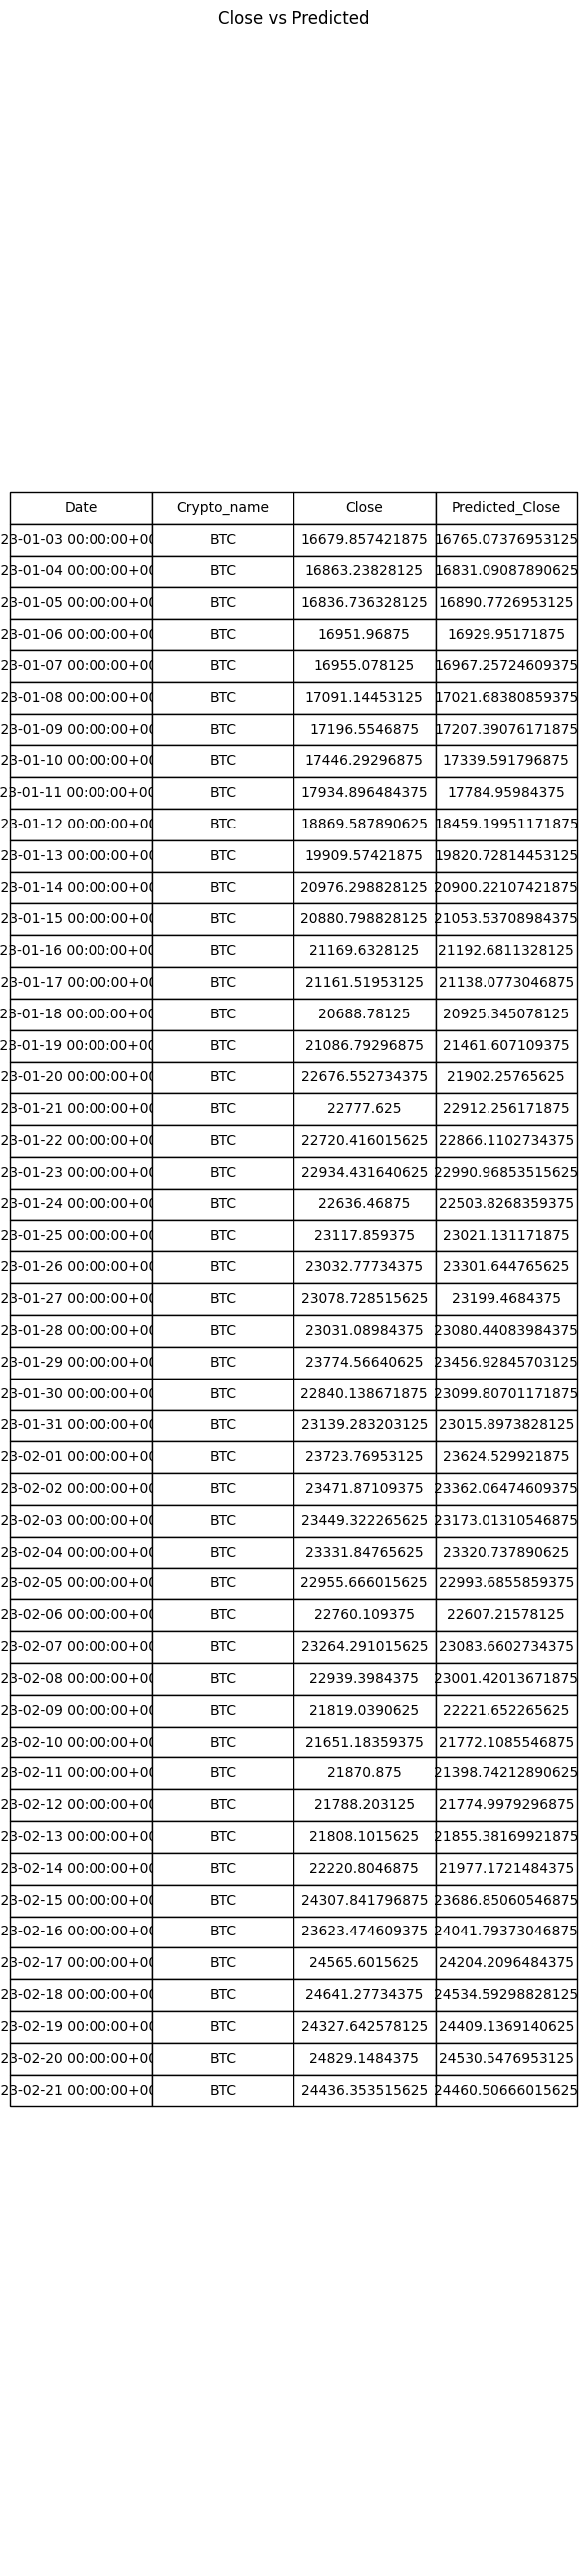

In [69]:
# Close Vs Predicted Close

df = pd.read_csv("comparison_table.csv")
df = df[["Date","Crypto_name","Close", "Predicted_Close"]].head(50)

fig,ax = plt.subplots(figsize=(6, len(df) * 0.5 + 1))
ax.axis("off")

table =  ax.table(cellText=df.values, colLabels=df.columns, cellLoc="center", loc="center")

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1,1.5)

plt.title("Close vs Predicted")
plt.tight_layout()
plt.show()
